In [1]:
import numpy as np
import src.implementation as impl

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['font.size'] = 12
sns.set_style('darkgrid')

np.random.seed(322)

In [2]:
# sumutation of dynamic system evolution throught time
def simulate(A, B, C, D, x, time, coeff, time_varying, bound=1):
    m, n = C.shape
    d = m + n
    y0 = C @ x + D @ np.random.randn(d)
    x_prev = np.copy(x)
    x = []
    y = []
    Delta = np.random.uniform(-bound, bound)
    A_purt = np.copy(A)
    A_purt[0, 1] += coeff * Delta
    for t in range(time):
        x.append(A_purt @ x_prev + B @ np.random.randn(d))
        y.append(C @ x_prev + D @ np.random.randn(d))
        x_prev = x[-1]
        A_purt[0, 1] -= coeff * Delta
        if time_varying:
            Delta = np.random.uniform(-bound, bound)
            A_purt[0, 1] += coeff * Delta
    return np.array(x), np.array(y), y0

In [ ]:
# dynamic system settings

n = 2
m = 1
A = np.array([[0.9802, 0.0196],
              [0, 0.9802]])
C = np.array([[1, -1]])
Q = np.array([[1.9608, 0.0195],
              [0.0195, 1.9605]])
u, s, _ = np.linalg.svd(Q)
Q_sqrt = u @ np.diag(np.sqrt(s)) @ u.T
B = np.concatenate([Q_sqrt, np.zeros((2, 1))], axis=1)
D = np.array([0, 0, 1])

run_count = 200
T = 20

x_0 = np.zeros(2)
V_0 = np.eye(2)
W_rads = np.arange(1, 2, 0.1) * 1e-1

coeff = 0.99

In [3]:
err_NKF = []
err_WRKF = []

for r in range(1, run_count + 1):
    [x, y, y0] = simulate(A, B, C, D, x_0, T, coeff, time_varying=False)
    bf = impl.NaiveKalman(A, B, C, D, x_0, V_0)
    x_hat = bf.evolution(y)
    err_NKF.append(np.linalg.norm(x - x_hat, axis=1) ** 2)

    wasserman_arr = []

    for p in W_rads:
        wasserman = impl.WRKF(A, B, C, D, x_0, V_0, p)
        x_hat = wasserman.evolution(y)
        wasserman_arr.append(np.linalg.norm(x - x_hat, axis=1) ** 2)

    idx = np.array(wasserman_arr).sum(axis=1).argmin()
    err_WRKF.append(wasserman_arr[idx])

    print(f"Done run {r}", end="\r")

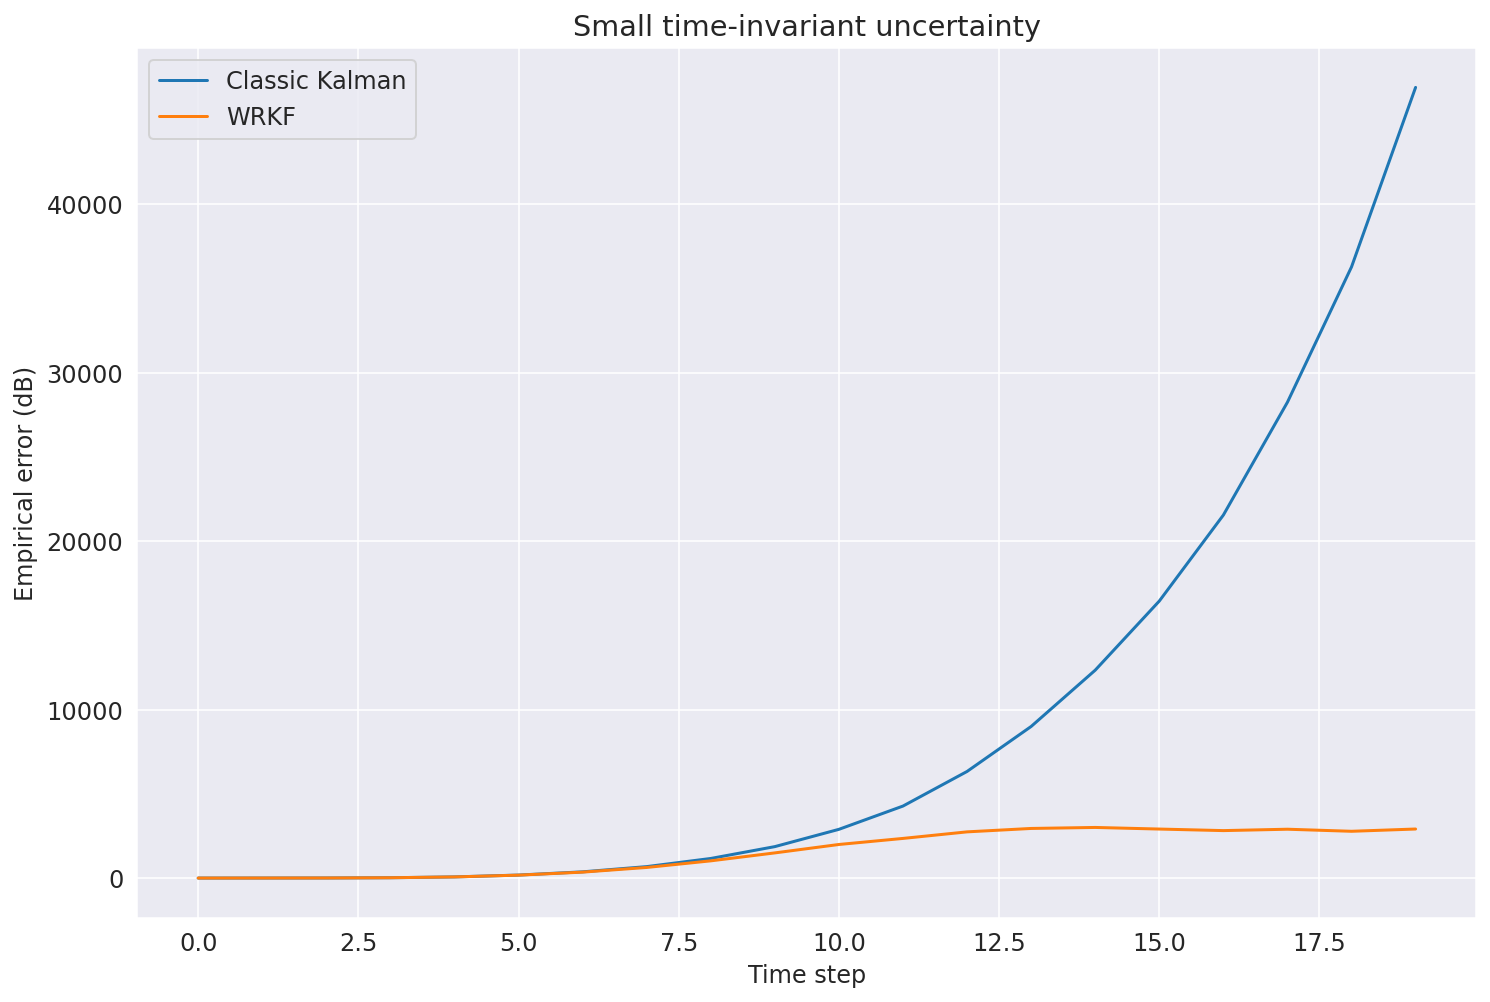

In [4]:
plt.title("Small time-invariant uncertainty")
plt.plot(np.array(err_NKF).mean(axis=0), label="Classic Kalman")
plt.plot(np.array(err_WRKF).mean(axis=0), label="WRKF")
plt.xlabel("Time step")
plt.ylabel("Empirical error (dB)")
plt.legend()
plt.savefig(f'exp1.pdf')
plt.show()

In [11]:

err_NKF = []
err_WRKF = []

for r in range(1, run_count + 1):
    [x, y, y0] = simulate(A, B, C, D, x_0, T, coeff, time_varying=True)
    naive_kf = impl.NaiveKalman(A, B, C, D, x_0, V_0)
    x_hat = naive_kf.evolution(y)
    err_NKF.append(np.linalg.norm(x - x_hat, axis=1) ** 2)

    wasserman_arr = []

    for p in W_rads:
        wasserman = impl.WRKF(A, B, C, D, x_0, V_0, p)
        x_hat = wasserman.evolution(y)
        wasserman_arr.append(np.linalg.norm(x - x_hat, axis=1) ** 2)

    idx = np.array(wasserman_arr).sum(axis=1).argmin()
    err_WRKF.append(wasserman_arr[idx])

    print(f"Done run {r}", end="\r")

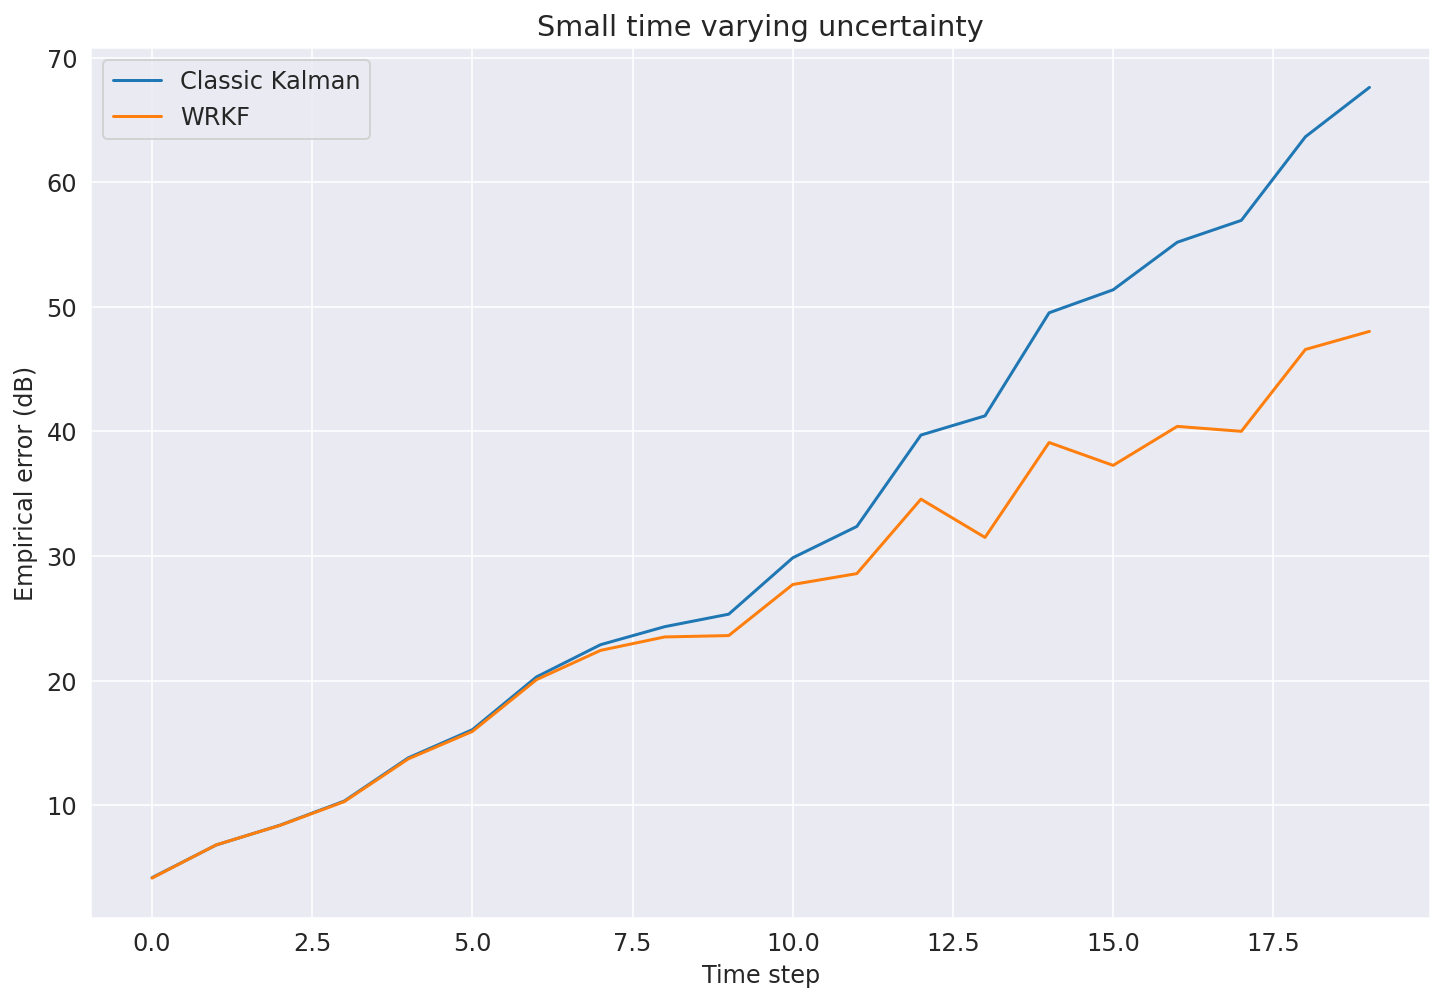

In [12]:
plt.title("Small time varying uncertainty")
plt.plot(np.array(err_NKF).mean(axis=0), label="Classic Kalman")
plt.plot(np.array(err_WRKF).mean(axis=0), label="WRKF")
plt.xlabel("Time step")
plt.ylabel("Empirical error (dB)")
plt.legend()
plt.savefig(f'exp2.pdf')
plt.show()

In [13]:
err_NKF = []
err_WRKF = []

for r in range(1, run_count + 1):
    [x, y, y0] = simulate(A, B, C, D, x_0, T, coeff, time_varying=False, bound=10)
    naive_kf = impl.NaiveKalman(A, B, C, D, x_0, V_0)
    x_hat = naive_kf.evolution(y)
    err_NKF.append(np.linalg.norm(x - x_hat, axis=1) ** 2)

    wasserman_arr = []

    for p in W_rads:
        wasserman = impl.WRKF(A, B, C, D, x_0, V_0, p)
        x_hat = wasserman.evolution(y)
        wasserman_arr.append(np.linalg.norm(x - x_hat, axis=1) ** 2)

    idx = np.array(wasserman_arr).sum(axis=1).argmin()
    err_WRKF.append(wasserman_arr[idx])

    print(f"Done run {r}", end="\r")

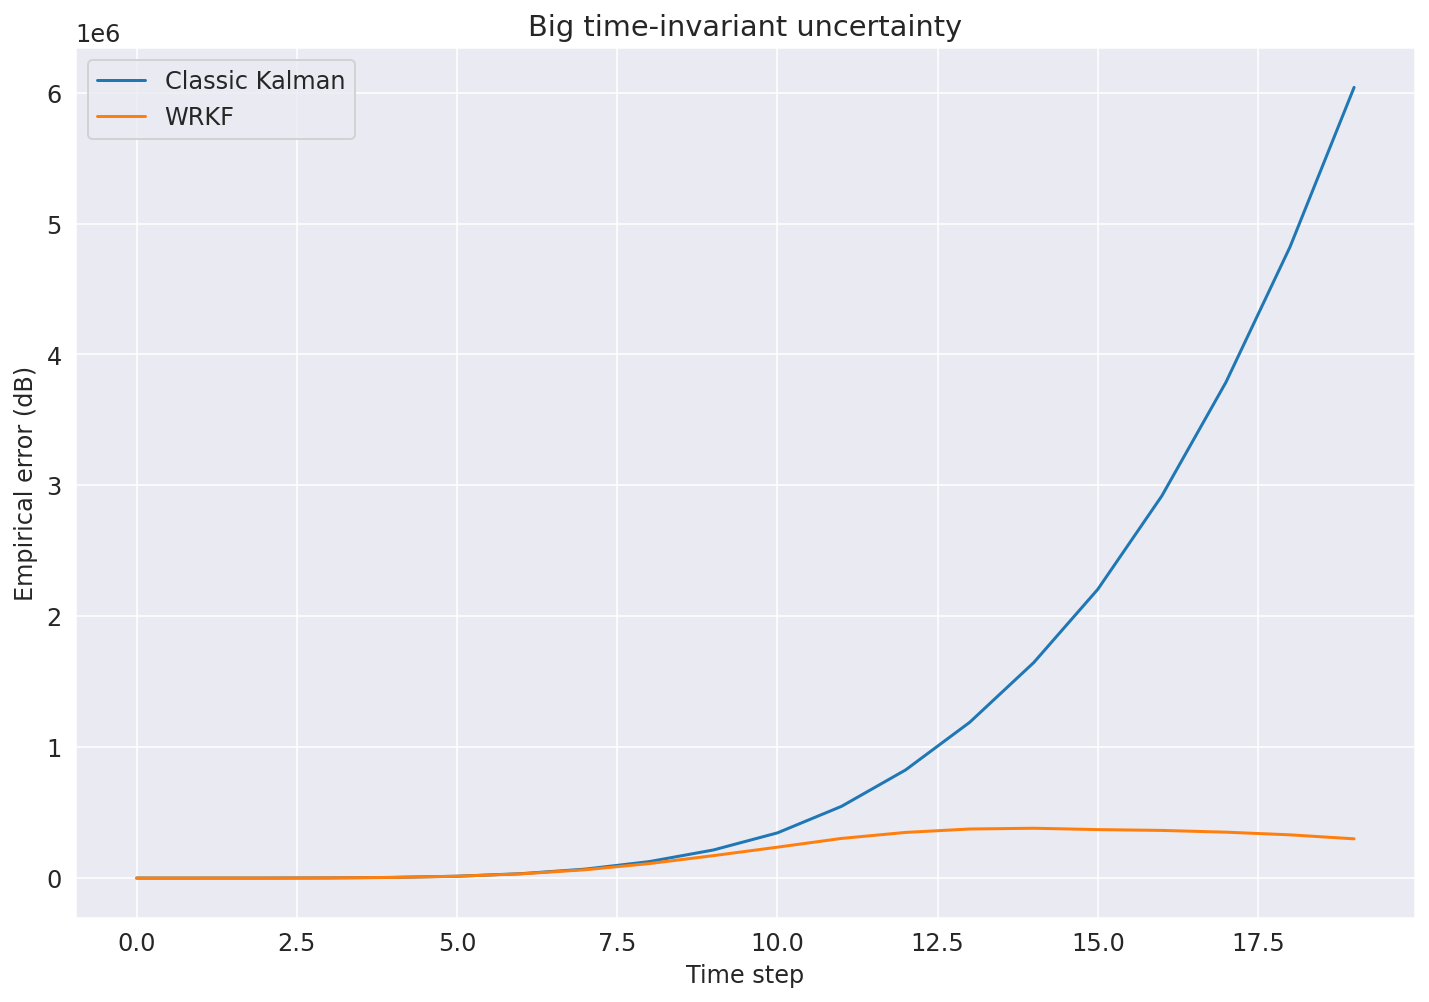

In [14]:
plt.title("Big time-invariant uncertainty")
plt.plot(np.array(err_NKF).mean(axis=0), label="Classic Kalman")
plt.plot(np.array(err_WRKF).mean(axis=0), label="WRKF")
plt.xlabel("Time step")
plt.ylabel("Empirical error (dB)")
plt.legend()
plt.savefig(f'exp3.pdf')
plt.show()

In [16]:
err_NKF = []
err_WRKF = []

for r in range(1, run_count + 1):
    [x, y, y0] = simulate(A, B, C, D, x_0, T, coeff, time_varying=True, bound=10)
    naive_kf = impl.NaiveKalman(A, B, C, D, x_0, V_0)
    x_hat = naive_kf.evolution(y)
    err_NKF.append(np.linalg.norm(x - x_hat, axis=1) ** 2)

    wasserman_arr = []

    for p in W_rads:
        wasserman = impl.WRKF(A, B, C, D, x_0, V_0, p)
        x_hat = wasserman.evolution(y)
        wasserman_arr.append(np.linalg.norm(x - x_hat, axis=1) ** 2)

    idx = np.array(wasserman_arr).sum(axis=1).argmin()
    err_WRKF.append(wasserman_arr[idx])

    print(f"Done run {r}", end="\r")

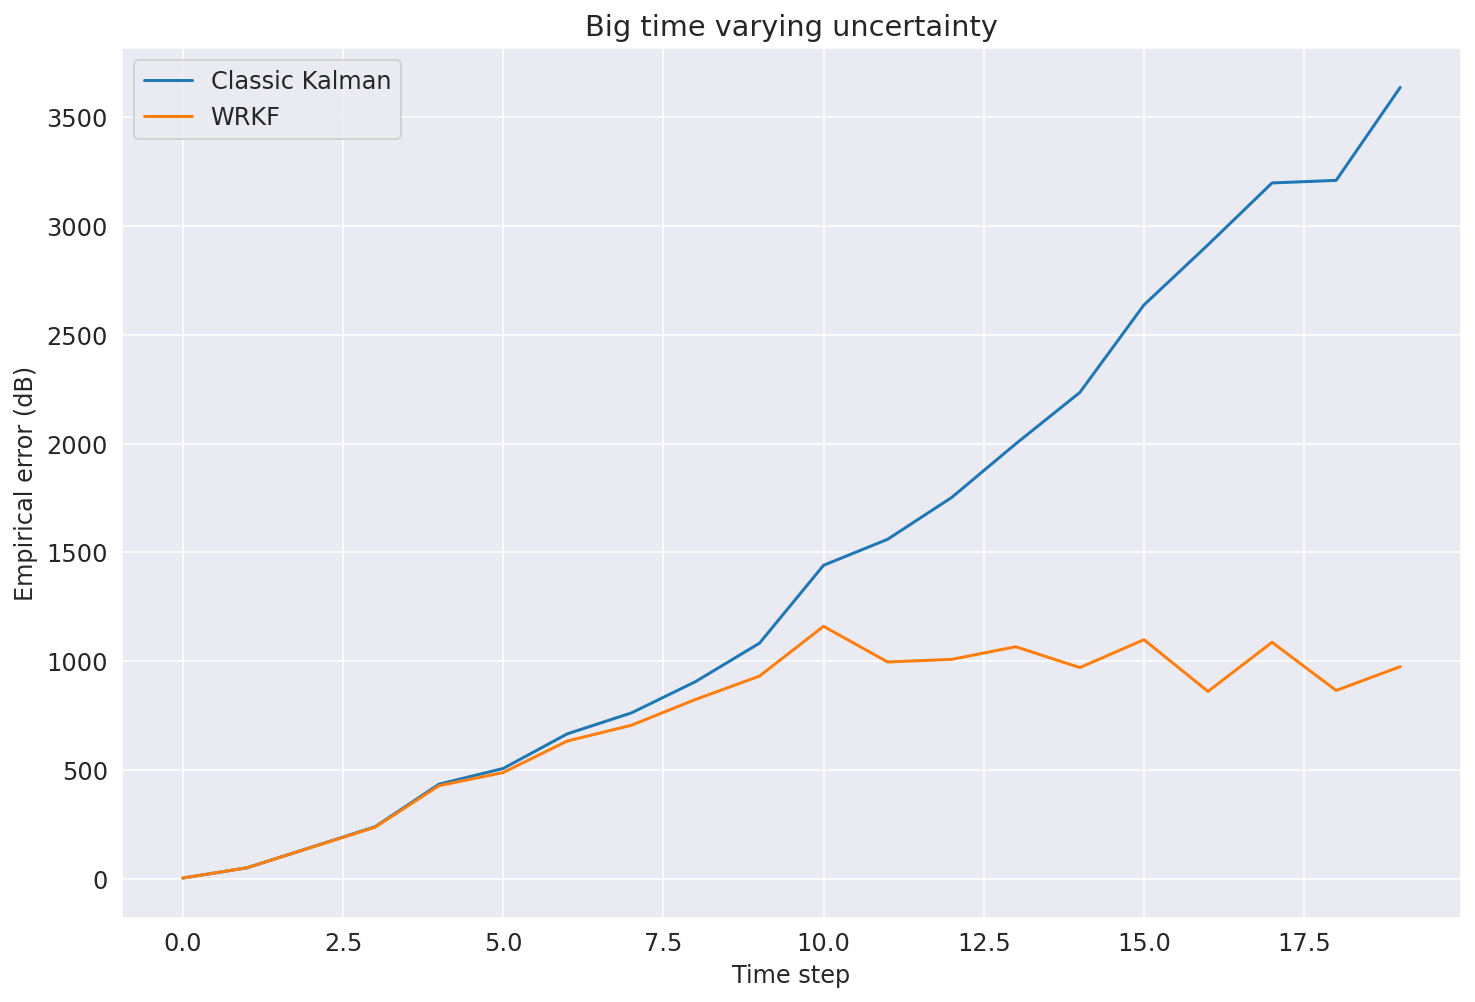

In [17]:
plt.title("Big time varying uncertainty")
plt.plot(np.array(err_NKF).mean(axis=0), label="Classic Kalman")
plt.plot(np.array(err_WRKF).mean(axis=0), label="WRKF")
plt.xlabel("Time step")
plt.ylabel("Empirical error (dB)")
plt.legend()
plt.savefig(f'exp4.pdf')
plt.show()